In [117]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import pandas as pd
from mpl_toolkits.basemap import Basemap

import the weather, turbine and sector power data

In [118]:
# weather data
weather = netCDF4.Dataset('20000530T00Z.nc', 'r')

# turbines and sector power output
turbines = pd.read_csv('windturbines.csv')
sector_power = pd.read_csv('windpower_task0_updated.csv')

Plotting country borders overlaid by a weather map and turbines position:

In [119]:
# time, ensemble member and variable to plot
t = 0
member = 0
variable = 'Temperature'

#Longitude and latitude from the weather netCDF
lons = weather.variables['longitude'][:]
lats = weather.variables['latitude'][:]

#Variable we want to plot
temperature = weather[variable][t, member, :, :]

In [120]:
#Longitude and latitude from the turbines df
tlon = turbines['Longitude'].values
tlat = turbines['Latitude'].values

In [121]:
#Make a dictionnary linking price region name to marker colour
region_colour_dict = {'SE1': 'g', 'SE2': 'm', 'SE3': 'r', 'SE4': 'b'}

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


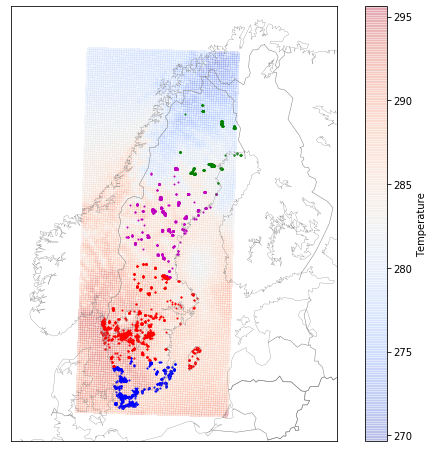

In [123]:
#Plot a map centred on Sweden
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection ='lcc', resolution = 'l', width=1500000, height=2000000, lat_0=63, lon_0=17)

#Overlay the weather data
m.pcolormesh(lons, lats, temperature, latlon=True, cmap='coolwarm', alpha = 0.2)
plt.colorbar(label=variable)

#Draw coastal lines and country borders
m.drawcoastlines(linewidth = 0.3, color='gray')
m.drawcountries(color='gray')

#Overlay the position of the turbines
x , y = m(tlon, tlat) #Convert lat and long to map projection coordinates
for i in range (0,len(turbines)):
    m.scatter(x[i], y[i], color=region_colour_dict[turbines['Price region'][i]], s = 1)